# 4.8. Task - Grouping Data & Aggregating Variables

## This script contains the following points:
#### 1. Creating a new notebook.
#### 2. Finding the aggregated mean of the “order_number” column grouped by “department_id” for the entire dataframe.
#### 3. Analysing how do the results for the entire dataframe differ from those of the subset.
#### 4. Creating a loyalty flag for existing customers using the transform() and loc() functions.
#### 5. Does the prices of products purchased by loyal customers differ from those purchased by regular or new customers.
#### 6. Creating a spending flag for each user based on the average price across all their orders by using the specific criteria.
#### 7. Creating an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column.
#### 8. Checking for Outliers
#### 9. Exporting data

### 1.	Create a new notebook for this task. Be sure to import the relevant libraries, along with your ords_prods_merge dataframe, which should include your newly derived columns from the previous Exercise.

##### Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

##### Set path

In [2]:
# Set path

path = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\4. Python Fundamentals for Data Analysts\05-05-2023 Instacart Basket Analysis'

In [3]:
# Check path

path

'C:\\Users\\Asus\\OneDrive\\Documents\\Data Analytics\\Data Immersion\\4. Python Fundamentals for Data Analysts\\05-05-2023 Instacart Basket Analysis'

##### Importing Data

In [4]:
# Import orders_products_merged_updated data in pickle format

df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_updated.pkl'))

In [5]:
# Check ords_prods_merge_updated data

df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20.0,0.0,both,Mid-range product,Bussiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11.0,1.0,both,Mid-range product,Least busy,Slowest days,Average orders


In [6]:
# Check ords_prods_merge_updated.shape data

df_ords_prods_merge.shape

(32404859, 18)

### 2.	In this Exercise, you learned how to find the aggregated mean of the “order_number” column grouped by “department_id” for a subset of your dataframe. Now, repeat this process for the entire dataframe.

In [7]:
# Grouping data by "department_id" and applying the agg() function for obtaining the mean values for the "order_number" column

df_ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


### 3.	Analyze the result. How do the results for the entire dataframe differ from those of the subset? Include your comments in a markdown cell below the executed code.

###### Most of the results from the entire dataframe has greater mean compared to the subset, except for department_id: 3, 10, 16, 18, 19 and 21.

### 4.	Follow the instructions in the Exercise for creating a loyalty flag for existing customers using the transform() and loc() functions.

In [8]:
# Split the data into groups based on the "user_id" column. Apply the transform() function on the "order_number" column to generate the maximum orders for each user

df_ords_prods_merge['max_order'] = df_ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [9]:
# Checking the result

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20.0,0.0,both,Mid-range product,Bussiest day,Busiest days,Average orders,5
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11.0,1.0,both,Mid-range product,Least busy,Slowest days,Average orders,3
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,15.0,2.0,1.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,20


In [10]:
# Creating a loyalty flag

df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [11]:
df_ords_prods_merge.loc[(df_ords_prods_merge['max_order'] <= 40) & (df_ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [12]:
df_ords_prods_merge.loc[df_ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [13]:
# Check df_ords_prods_merge.head

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20.0,0.0,both,Mid-range product,Bussiest day,Busiest days,Average orders,5,New customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11.0,1.0,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,15.0,2.0,1.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer


In [14]:
# Checking the count of 'loyalty_flag' values

df_ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [15]:
# Checking the sum of counts

df_ords_prods_merge['loyalty_flag'].value_counts(dropna = False).sum()

32404859

In [16]:
# Checking the df_ords_prods_merge.shape

df_ords_prods_merge.shape

(32404859, 20)

### 5.	The marketing team at Instacart wants to know whether there’s a difference between the spending habits of the three types of customers you identified. Use the loyalty flag you created and check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer). What you’re trying to determine is whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers.

In [17]:
# Grouping data by "loyalty_flag" and applying the agg() function for obtaining the mean, min, max, sum values for the "prices" column

df_ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'sum']})

prices                           
                       mean  min      max          sum
loyalty_flag                                          
Loyal customer    10.386336  1.0  99999.0  106814042.2
New customer      13.294670  1.0  99999.0   83011787.2
Regular customer  12.495717  1.0  99999.0  198391693.2

##### "Loyal customers" purchase on average cheaper products than "New" and "Regular customers". Minimum and Maximum are the same for all the categories. The sum of prices is highest for "Regular customer" but this is because of the higher count of "Regular customers" compared to "Loyal" and "New customers".

### 6.	The team now wants to target different types of spenders in their marketing campaigns. This can be achieved by looking at the prices of the items people are buying. Create a spending flag for each user based on the average price across all their orders using the following criteria:
-	If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
-	If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”


In [18]:
# Split the data into groups based on the "avg_price" column. Apply the transform() function on the "prices" column to generate the average prices for each user

df_ords_prods_merge['avg_price'] = df_ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [19]:
# Checking the result

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1.0,1.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20.0,0.0,both,Mid-range product,Bussiest day,Busiest days,Average orders,5,New customer,7.930208
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11.0,1.0,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,7.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,2.0,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,1.0,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,1.0,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,2.0,1.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500


In [20]:
# Creating a loyalty flag

df_ords_prods_merge.loc[df_ords_prods_merge['avg_price'] < 10, 'spending_flag'] = 'Low spender'

In [21]:
df_ords_prods_merge.loc[df_ords_prods_merge['avg_price'] >= 10, 'spending_flag'] = 'High spender'

In [22]:
# Checking the result

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,reordered,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,0.0,both,Mid-range product,Bussiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,1.0,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low spender
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,0.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low spender
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,0.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000,Low spender
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,0.0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500,Low spender
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,1.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500,Low spender


In [23]:
# Checking the count of 'spending_flag' values

df_ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

In [24]:
# Checking the sum of counts

df_ords_prods_merge['spending_flag'].value_counts(dropna = False).sum()

32404859

In [25]:
# Checking df_ords_prods_merge.shape

df_ords_prods_merge.shape

(32404859, 22)

### 7.	In order to send relevant notifications to users within the app (for instance, asking users if they want to buy the same item again), the Instacart team wants you to determine frequent versus non-frequent customers. Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column. The criteria for the flag should be as follows:
-	If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
-	If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
-	If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”


In [26]:
#Split the data into groups based on the 'user_id' column. Apply the transform() function on the 'days_since_prior_order' column to generate the median order frequency for each user.

df_ords_prods_merge['median_frequency'] = df_ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [27]:
# Checking the result

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,merge_products,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Mid-range product,Bussiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000,Low spender,6.0
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500,Low spender,10.0
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500,Low spender,10.0


In [28]:
# Creating a loyalty flag

df_ords_prods_merge.loc[df_ords_prods_merge['median_frequency'] > 20, 'order_frequency_flag'] = 'Non-frequent customer'

In [29]:
df_ords_prods_merge.loc[(df_ords_prods_merge['median_frequency'] > 10) & (df_ords_prods_merge['median_frequency'] <= 20), 'order_frequency_flag'] = 'Regular customer'

In [30]:
df_ords_prods_merge.loc[df_ords_prods_merge['median_frequency'] <= 10, 'order_frequency_flag'] = 'Frequent customer'

In [31]:
# Checking the result

df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,order_frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Bussiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000,Low spender,6.0,Frequent customer
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500,Low spender,10.0,Frequent customer
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500,Low spender,10.0,Frequent customer


In [32]:
# Checking the count of 'order_frequency_flag' values

df_ords_prods_merge['order_frequency_flag'].value_counts()

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: order_frequency_flag, dtype: int64

In [33]:
# Checking the sum of counts

df_ords_prods_merge['order_frequency_flag'].value_counts(dropna = False).sum()

32404859

In [34]:
# Checking df_ords_prods_merge.shape

df_ords_prods_merge.shape

(32404859, 24)

### 8. Checking for Outliers

In [35]:
# Data consistency check on df_ords_prods_merge

df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [36]:
# Data consistency check on df_ords_prods_merge - mean

df_ords_prods_merge['prices'].mean()

11.980225638383468

In [37]:
# Data consistency check on df_ords_prods_merge - median

df_ords_prods_merge['prices'].median()

7.4

In [38]:
# Data consistency check on df_ords_prods_merge - max

df_ords_prods_merge['prices'].max()

99999.0

## Creating a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

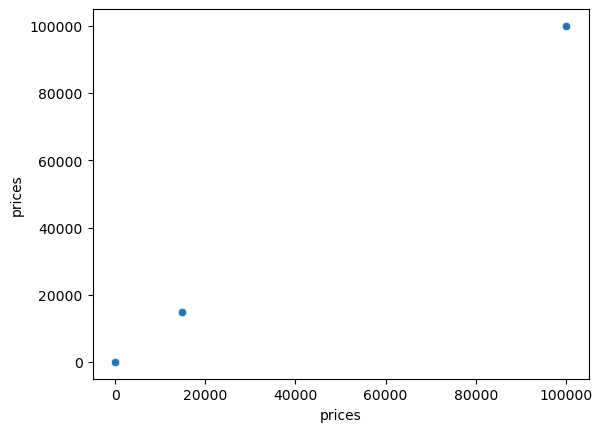

In [39]:
# Create Scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

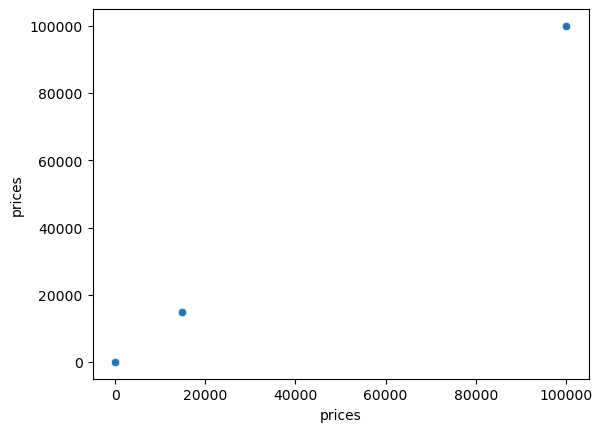

In [40]:
# Exporting Scatterplot

sctplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [41]:
# Export Scatterplot outside of Jupyter in the form of an image file

sctplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sctplot_prices.png'))

In [42]:
# Checking for Outliers - anything above max price of $100

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Bussiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Bussiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Bussiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [43]:
# Marking outliers as Missing (NaN)

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [44]:
# Check NaN's

df_ords_prods_merge['prices'].max()

25.0

### 9. Exporting data

In [45]:
# Exporting data

df_ords_prods_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_aggregated.pkl'))